### Setup

In [1]:
# bibliotecas
#install.packages("ROCR")
#install.packages("leaps")
#install.packages("ggplot2")
#install.packages("ggpubr")
#install.packages("caret")
#install.packages("GGally")

library(ROCR)
require(leaps)
library(ggplot2)
library(ggpubr)
library(caret)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: leaps
Loading required package: magrittr
Loading required package: lattice


### Aquisição dos dados

In [2]:
file_name <- "noshow_4000+_natual_trans"
#file_name <- "no-show-201707-201806_trans"
noshowDs <- read.csv(paste(file_name, ".csv", sep = ""), sep = ";", header = TRUE, fileEncoding = "ISO-8859-1")

### Modelagem

In [3]:
# garante a repetição do experimento
set.seed(1984)

In [4]:
# dummy encode para as variáveis categóricas
#noshowDs <- dummy.data.frame(noshowDs)
# transforma IsNoShow em factor para conformidade com o CV
noshowDs["IsNoShow"] <- as.factor(noshowDs[,"IsNoShow"])

In [5]:
nrow(noshowDs)

[1] 4086

In [6]:
noshowDs[noshowDs$GeneroPaciente == "N",] <- NA
noshowDs <- na.omit(noshowDs)
noshowDs$GeneroPaciente <- factor(noshowDs$GeneroPaciente)

In [7]:
# cria o controle para o CV com 20 partições dos dados e 5 repetições 
ctrl <- trainControl(method = "repeatedcv", number = 20, repeats = 5)
# ajusta um modelo de regressão logística, usando a função de treinamento da biblioteca caret
completo <- IsNoShow ~ .
fit <- train(completo, data = noshowDs,
                  method = "glm", 
                  family = "binomial",
                  trControl = ctrl, 
                  preProcess = c("center", "scale"))

In [8]:
fit
summary(fit)

Generalized Linear Model 

4085 samples
  16 predictor
   2 classes: 'FALSE', 'TRUE' 

Pre-processing: centered (17), scaled (17) 
Resampling: Cross-Validated (20 fold, repeated 5 times) 
Summary of sample sizes: 3881, 3880, 3882, 3882, 3881, 3880, ... 
Resampling results:

  Accuracy   Kappa    
  0.8715422  0.5654644



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2240  -0.4084  -0.3416  -0.2901   2.5766  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.683167   0.232737  -7.232 4.76e-13 ***
Idade                      -0.001786   0.053649  -0.033   0.9734    
GeneroPacienteM             0.041632   0.051054   0.815   0.4148    
IsPacienteUnicoAtendimento  0.007235   0.073677   0.098   0.9218    
IsNovoPacienteTRUE          0.027248   0.057629   0.473   0.6363    
LeadTime                    0.115835   0.053721   2.156   0.0311 *  
Mes                         0.072559   0.052359   1.386   0.1658    
DiaSemana                   0.122098   0.052507   2.325   0.0201 *  
Hora                       -0.032440   0.052815  -0.614   0.5391    
IsPacientePossuiFoneTRUE   -0.261208   8.337194  -0.031   0.9750    
QtdRedesSociais            -0.077629   0.055291  -1.404   0.1603    
IsPacientePossuiEmailTRUE  -0.0

In [9]:
# aplica o modelo para predição
predict_test = predict(fit, newdata = noshowDs, type="raw")

In [10]:
caret::confusionMatrix(
    factor(noshowDs$IsNoShow, levels = c("TRUE", "FALSE")), 
    factor(predict_test, levels = c("TRUE", "FALSE")), 
    positive = "TRUE"
)

Confusion Matrix and Statistics

          Reference
Prediction TRUE FALSE
     TRUE   474   396
     FALSE  121  3094
                                          
               Accuracy : 0.8734          
                 95% CI : (0.8629, 0.8835)
    No Information Rate : 0.8543          
    P-Value [Acc > NIR] : 0.0002346       
                                          
                  Kappa : 0.5733          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7966          
            Specificity : 0.8865          
         Pos Pred Value : 0.5448          
         Neg Pred Value : 0.9624          
             Prevalence : 0.1457          
         Detection Rate : 0.1160          
   Detection Prevalence : 0.2130          
      Balanced Accuracy : 0.8416          
                                          
       'Positive' Class : TRUE            
                     

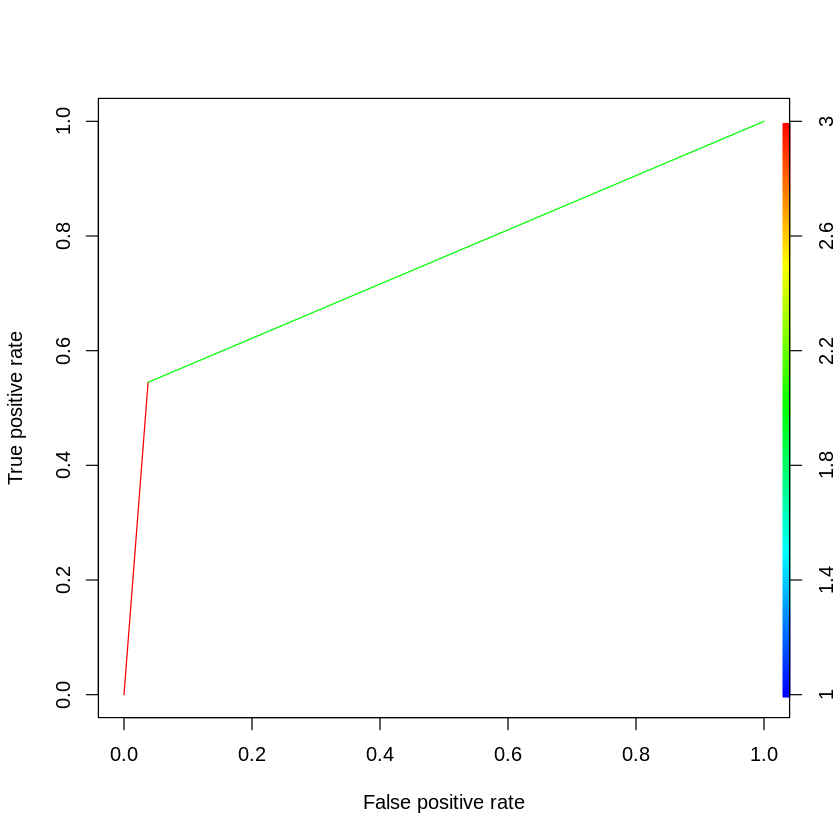

In [11]:
# curva ROC
pr <- prediction(as.numeric(predict_test), as.numeric(noshowDs$IsNoShow))
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf, colorize = TRUE)

In [12]:
# Area under ROC curve 
auc=performance(pr, measure="auc")
auc=auc@y.values[[1]]
auc

[1] 0.7535958

### Exploração do modelo

In [13]:
# visualização do modelo
summary(fit)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2240  -0.4084  -0.3416  -0.2901   2.5766  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.683167   0.232737  -7.232 4.76e-13 ***
Idade                      -0.001786   0.053649  -0.033   0.9734    
GeneroPacienteM             0.041632   0.051054   0.815   0.4148    
IsPacienteUnicoAtendimento  0.007235   0.073677   0.098   0.9218    
IsNovoPacienteTRUE          0.027248   0.057629   0.473   0.6363    
LeadTime                    0.115835   0.053721   2.156   0.0311 *  
Mes                         0.072559   0.052359   1.386   0.1658    
DiaSemana                   0.122098   0.052507   2.325   0.0201 *  
Hora                       -0.032440   0.052815  -0.614   0.5391    
IsPacientePossuiFoneTRUE   -0.261208   8.337194  -0.031   0.9750    
QtdRedesSociais            -0.077629   0.055291  -1.404   0.1603    
IsPacientePossuiEmailTRUE  -0.0

In [14]:
# transformação sobre os parâmetros do modelo
exp(fit$finalModel$coefficients)

(Intercept)                      Idade 
                 0.1857846                  0.9982152 
           GeneroPacienteM IsPacienteUnicoAtendimento 
                 1.0425103                  1.0072617 
        IsNovoPacienteTRUE                   LeadTime 
                 1.0276226                  1.1228107 
                       Mes                  DiaSemana 
                 1.0752565                  1.1298649 
                      Hora   IsPacientePossuiFoneTRUE 
                 0.9680802                  0.7701204 
           QtdRedesSociais  IsPacientePossuiEmailTRUE 
                 0.9253078                  0.9932680 
          IsParticularTRUE          GeneroExecutanteM 
                 1.1055145                  0.8889036 
         GeneroExecutanteN          QtdNoShowPaciente 
                 1.0148842                  1.1217811 
   QtdAgendamentosPaciente        RazaoNoShowPaciente 
                 0.9164650                  5.9545832

In [15]:
varImp(fit, scale = FALSE)

glm variable importance

                            Overall
RazaoNoShowPaciente        19.50978
DiaSemana                   2.32536
GeneroExecutanteM           2.27647
LeadTime                    2.15625
IsParticularTRUE            1.88917
QtdNoShowPaciente           1.56439
QtdRedesSociais             1.40399
Mes                         1.38579
QtdAgendamentosPaciente     0.97246
GeneroPacienteM             0.81544
Hora                        0.61422
IsNovoPacienteTRUE          0.47282
GeneroExecutanteN           0.32405
IsPacientePossuiEmailTRUE   0.13048
IsPacienteUnicoAtendimento  0.09821
Idade                       0.03330
IsPacientePossuiFoneTRUE    0.03133

### Teste em um novo conjunto de dados

In [16]:
nome_arquivo <- "noshow_201808"
noshowDs <- read.csv(paste(nome_arquivo, ".csv", sep = ""), sep = ";", header = TRUE, fileEncoding = "ISO-8859-1")

In [17]:
# dimensões do dataset
dim(noshowDs)

[1] 592  45

In [18]:
# seleciona 100 elementos para o teste
T <- sample(1:nrow(noshowDs), 100)
noshowDs <- noshowDs[T, ]

In [19]:
head(noshowDs)
tail(noshowDs)
summary(noshowDs)

,IsNoShow,DataNascimento,Idade,GeneroPaciente,IsPacienteUnicoAtendimento,IsNovoPaciente,Profissao,LeadTime,Mes,DiaSemana,⋯,GeneroExecutante,IsProcedimentoComJejum,IsProcedimentoComPreparacao,IsTodosExamesMesmaUnidade,IsAgendamentoComNecessidadesEspeciais,Perguntas,PerguntasDescricao,Respostas,QtdNoShowPaciente,QtdAgendamentosPaciente
,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>
546,0,2011-11-19,9,F,0,0,null,1,8,4,⋯,M,0,1,0,0,null,null,null,0,3
451,0,1947-08-16,73,F,0,0,MEDICO ORTOMOLECULAR,1,8,5,⋯,F,0,1,0,0,null,null,null,0,9
108,0,1923-08-19,97,F,1,1,null,3,8,3,⋯,M,0,1,0,0,null,null,null,0,1
166,0,1924-02-27,96,F,0,0,MEDICO ORTOMOLECULAR,1,8,4,⋯,M,0,1,0,0,null,null,null,2,11
220,0,1926-09-26,94,F,0,0,null,4,8,7,⋯,M,0,1,0,0,null,null,null,1,4
234,0,1927-10-16,93,F,0,0,null,3,8,2,⋯,M,0,1,0,0,null,null,null,2,16


,IsNoShow,DataNascimento,Idade,GeneroPaciente,IsPacienteUnicoAtendimento,IsNovoPaciente,Profissao,LeadTime,Mes,DiaSemana,⋯,GeneroExecutante,IsProcedimentoComJejum,IsProcedimentoComPreparacao,IsTodosExamesMesmaUnidade,IsAgendamentoComNecessidadesEspeciais,Perguntas,PerguntasDescricao,Respostas,QtdNoShowPaciente,QtdAgendamentosPaciente
,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>
464,1,1941-09-03,79,F,0,0,MEDICO ORTOMOLECULAR,1,8,6,⋯,M,0,1,0,0,null,null,null,4,4
281,0,1999-03-22,21,F,1,1,MEDICO ORTOMOLECULAR,6,8,3,⋯,F,0,1,0,0,null,null,null,0,1
30,0,1931-05-09,89,F,0,0,MEDICO ORTOMOLECULAR,1,8,5,⋯,M,0,1,0,0,null,null,null,0,3
442,1,1942-10-13,78,F,1,1,null,6,8,5,⋯,M,0,1,0,0,null,null,null,1,1
532,0,1950-05-16,70,F,0,0,null,1,8,3,⋯,F,0,1,0,0,null,null,null,0,3
360,1,1934-03-12,86,F,0,0,null,4,8,6,⋯,F,0,1,0,0,null,null,null,13,29


    IsNoShow       DataNascimento     Idade        GeneroPaciente
 Min.   :0.00   1939-02-28: 2     Min.   :  2.00   F:73          
 1st Qu.:0.00   2018-08-16: 2     1st Qu.: 66.75   M:27          
 Median :0.00   1917-10-27: 1     Median : 80.00                 
 Mean   :0.17   1918-05-30: 1     Mean   : 72.89                 
 3rd Qu.:0.00   1923-08-19: 1     3rd Qu.: 90.00                 
 Max.   :1.00   1924-02-27: 1     Max.   :103.00                 
                (Other)   :92                                    
 IsPacienteUnicoAtendimento IsNovoPaciente                Profissao 
 Min.   :0.00               Min.   :0.00   Médico              : 1  
 1st Qu.:0.00               1st Qu.:0.00   MEDICO ORTOMOLECULAR:61  
 Median :0.00               Median :0.00   null                :38  
 Mean   :0.25               Mean   :0.29                            
 3rd Qu.:0.25               3rd Qu.:1.00                            
 Max.   :1.00               Max.   :1.00                  

In [20]:
# remoção de colunas que não serão utilizadas na modelagem
col_excluir <- c(
    "DataNascimento",
    "EnderecoCidadeUnidade", "EnderecoBairroUnidade", "EnderecoCepUnidade",
    "EnderecoCidadePaciente", "EnderecoBairroPaciente", "EnderecoCepPaciente",
    "Profissao", "IsEmancipado", "EspecialidadeSolicitante", "ProcedimentoMnemonico", 
    "Procedimento", "ProcedimentoDescricao", "Setor", "SetorDescricao",
    "IsVip", "Perguntas", "PerguntasDescricao", "Respostas", "Segmento", "IsFeriado",
    # não estavam deixando o modelo convergir...
    "EstacaoAno","IsEncaixe","IsIndicacaoMedica","IsProcedimentoComJejum", "IsProcedimentoComPreparacao",
    "IsTodosExamesMesmaUnidade", "IsAgendamentoComNecessidadesEspeciais", "IsAgendamentoPossuiExecutante"
)
noshowDs <- noshowDs[!(names(noshowDs) %in% col_excluir)]

In [21]:
# transforma todas as string "null" em NA
noshowDs[noshowDs == "null"] <- NA
#noshowDs[noshowDs$GeneroExecutante == "N",] <- NA
noshowDs <- na.omit(noshowDs)

In [22]:
# transformação da coluna de horário em numérico
# calcula a quantidade de segundos a partir de 00:00:00
tmp1 <- paste(Sys.Date(), " ", noshowDs$Hora)
tmp2 <- as.POSIXct(tmp1)
tmp3 <- as.POSIXct(paste(Sys.Date(), " 00:00:00"))
noshowDs$Hora <- as.numeric(tmp2) - as.numeric(tmp3)

In [23]:
# transforma todas as colunas 0/1 em FALSE/TRUE
bool_columns <- c(
    "IsNoShow", "IsNovoPaciente", "IsPacientePossuiFone", "IsPacientePossuiEmail", "IsParticular"
)
noshowDs[bool_columns] <- noshowDs[bool_columns] == 1

In [24]:
# cria uma coluna com a razão de no-show do paciente
noshowDs["RazaoNoShowPaciente"] <- noshowDs["QtdNoShowPaciente"] / noshowDs["QtdAgendamentosPaciente"]

In [25]:
# aplica o modelo para predição
predict_test = predict(fit, newdata = noshowDs, type="raw")

In [26]:
# Matriz de confusão do modelo e acurácia do modelo
cm <- caret::confusionMatrix(
    factor(predict_test, levels = c("TRUE", "FALSE")), 
    factor(noshowDs$IsNoShow, levels = c("TRUE", "FALSE")), 
    positive = "TRUE"
)
cm

Confusion Matrix and Statistics

          Reference
Prediction TRUE FALSE
     TRUE     5     3
     FALSE   12    80
                                          
               Accuracy : 0.85            
                 95% CI : (0.7647, 0.9135)
    No Information Rate : 0.83            
    P-Value [Acc > NIR] : 0.35422         
                                          
                  Kappa : 0.3268          
                                          
 Mcnemar's Test P-Value : 0.03887         
                                          
            Sensitivity : 0.2941          
            Specificity : 0.9639          
         Pos Pred Value : 0.6250          
         Neg Pred Value : 0.8696          
             Prevalence : 0.1700          
         Detection Rate : 0.0500          
   Detection Prevalence : 0.0800          
      Balanced Accuracy : 0.6290          
                                          
       'Positive' Class : TRUE            
                     

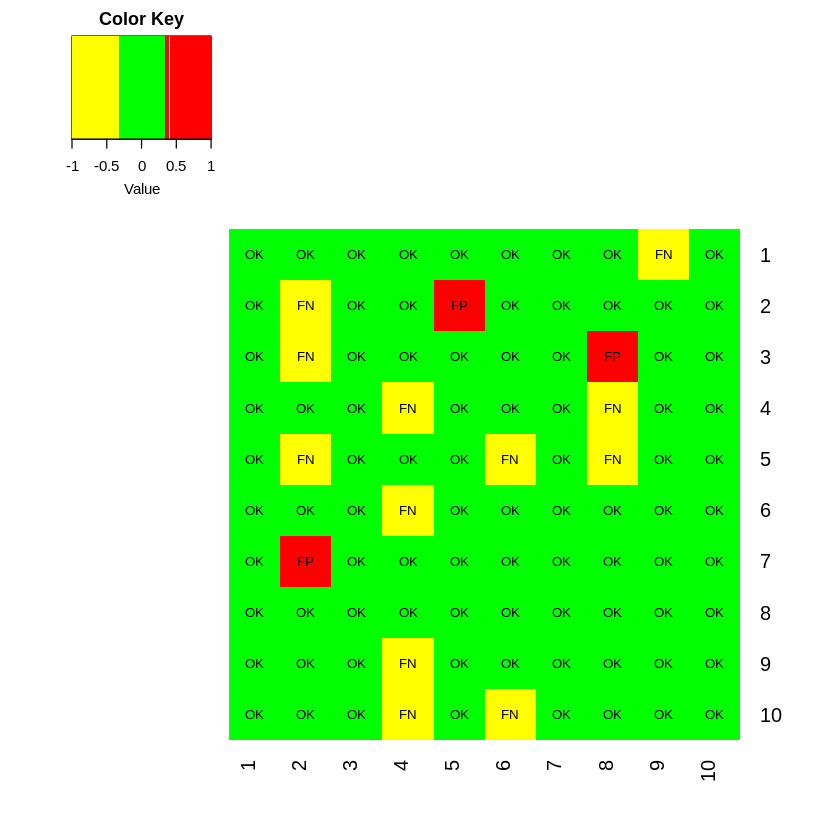

In [27]:
x <- matrix(as.numeric(predict_test) - as.numeric(noshowDs$IsNoShow) - 1, nrow = 10, ncol = 10)
xval <- x
xval[xval == 0] <- "OK"
xval[xval == -1] <- "FN"
xval[xval == 1] <- "FP"
pal <- c("yellow", "green", "red") #colorRampPalette(c(rgb(0.96,0.96,1), rgb(0.1,0.1,0.9)), space = "rgb")
heatmap.2(
    x,
    Rowv=FALSE, Colv=FALSE, dendrogram="none", 
    col=pal, tracecol="#303030", trace="none", cellnote=xval, 
    density.info = "none", 
    notecol="black", notecex=0.8, keysize = 1.5, margins=c(5, 5)
)

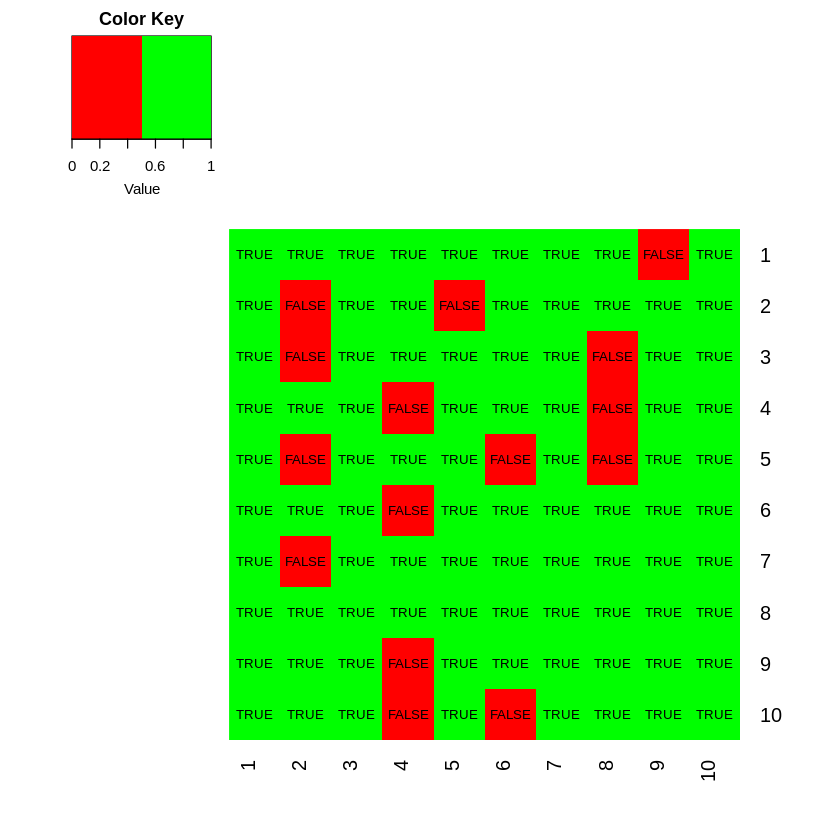

In [28]:
x <- matrix(as.numeric(predict_test == noshowDs$IsNoShow), nrow = 10, ncol = 10)
xval <- x == 1 #formatC(x, format="f", digits=2)
pal <- c("red","green") #colorRampPalette(c(rgb(0.96,0.96,1), rgb(0.1,0.1,0.9)), space = "rgb")
heatmap.2(
    x,
    Rowv=FALSE, Colv=FALSE, dendrogram="none", 
    col=pal, tracecol="#303030", trace="none", cellnote=xval, 
    density.info = "none", 
    notecol="black", notecex=0.8, keysize = 1.5, margins=c(5, 5)
)